In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import datasets
%matplotlib inline
from sklearn import metrics

In [2]:
dataset = pd.read_csv('credit_card_data.csv')
dataset

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.520,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.420,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.500,0.004156,15.000000,yes,no,4,58,1,5
3,NaN,1,29.50000,3.960,0.044438,137.869200,yes,no,0,168,1,22
4,yes,0,30.50000,2.540,0.065214,137.869200,no,no,0,25,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,NaN,1,29.50000,3.960,0.044438,137.869200,yes,no,0,168,1,22
1316,no,5,23.91667,3.192,0.000376,0.000000,no,no,3,12,1,5
1317,yes,0,40.58333,4.600,0.026513,101.298300,yes,no,2,1,1,2
1318,yes,0,32.83333,3.700,0.008999,26.996670,no,yes,0,60,1,7


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1308 non-null   object 
 1   reports      1320 non-null   int64  
 2   age          1320 non-null   float64
 3   income       1320 non-null   float64
 4   share        1320 non-null   float64
 5   expenditure  1320 non-null   float64
 6   owner        1320 non-null   object 
 7   selfemp      1320 non-null   object 
 8   dependents   1320 non-null   int64  
 9   months       1320 non-null   int64  
 10  majorcards   1320 non-null   int64  
 11  active       1320 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.9+ KB


Explore Dataset

In [4]:
dataset

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.520,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.420,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.500,0.004156,15.000000,yes,no,4,58,1,5
3,NaN,1,29.50000,3.960,0.044438,137.869200,yes,no,0,168,1,22
4,yes,0,30.50000,2.540,0.065214,137.869200,no,no,0,25,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,NaN,1,29.50000,3.960,0.044438,137.869200,yes,no,0,168,1,22
1316,no,5,23.91667,3.192,0.000376,0.000000,no,no,3,12,1,5
1317,yes,0,40.58333,4.600,0.026513,101.298300,yes,no,2,1,1,2
1318,yes,0,32.83333,3.700,0.008999,26.996670,no,yes,0,60,1,7


In [5]:
dataset.replace(to_replace = ['yes','no'],value = [1,0], inplace = True)

In [6]:
dataset.describe()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1308.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,0.774465,0.465152,33.183460,3.368898,0.068488,184.974782,0.446212,0.067424,0.984848,56.412879,0.818182,7.131061
std,0.418094,1.345083,10.120086,1.667962,0.094383,271.868719,0.497287,0.250850,1.247195,67.012135,0.385841,6.428373
min,0.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.250000,0.002443,5.286458,0.000000,0.000000,0.000000,12.000000,1.000000,2.000000
50%,1.000000,0.000000,31.083330,2.950000,0.039676,103.152500,0.000000,0.000000,0.000000,30.000000,1.000000,6.000000
75%,1.000000,0.000000,39.333330,3.995950,0.093218,247.600850,1.000000,0.000000,2.000000,72.000000,1.000000,11.000000
max,1.000000,14.000000,83.500000,12.499900,0.906320,3099.505000,1.000000,1.000000,6.000000,540.000000,1.000000,46.000000


In [7]:

pd.set_option('display.max_columns', None)
dataset.groupby('card').describe()


reports                                                   age             \
       count      mean       std  min  25%  50%  75%   max   count       mean   
card                                                                            
0.0    295.0  1.593220  2.416769  0.0  0.0  1.0  2.0  14.0   295.0  33.176836   
1.0   1013.0  0.130306  0.417975  0.0  0.0  0.0  0.0   4.0  1013.0  33.229023   

                                                                    income  \
            std       min       25%       50%        75%       max   count   
card                                                                         
0.0    9.927924  0.750000  25.62500  31.75000  37.916665  80.16666   295.0   
1.0   10.231714  0.166667  25.33333  31.08333  39.750000  83.50000  1013.0   

                                                           share            \
          mean       std   min   25%  50%   75%      max   count      mean   
card                                                                         
0.0   3.072674  1.616489  0.49  2.00  2.6  3.65  11.0000   295.0  0.000476   
1.0   3.448160  1.682539  0.21  2.35  3.0  4.00  12.4999  1013.0  0.088579   

                                                                 expenditure  \
           std       min       25%       50%       75%       max       count   
card                                                                           
0.0   0.000213  0.000109  0.000329  0.000462  0.000600  0.002449       295.0   
1.0   0.099253  0.000186  0.026674  0.060209  0.113949  0.906320      1013.0   

                                                                         \
            mean         std  min       25%     50%       75%       max   
card                                                                      
0.0     0.000000    0.000000  0.0   0.00000    0.00    0.0000     0.000   
1.0   239.400081  288.737625  0.0  66.30083  150.79  314.4908  3099.505   

       owner                                              selfemp            \
       count      mean       std  min  25%  50%  75%  max   count      mean   
card                                                                          
0.0    295.0  0.305085  0.461226  0.0  0.0  0.0  1.0  1.0   295.0  0.091525   
1.0   1013.0  0.480750  0.499876  0.0  0.0  0.0  1.0  1.0  1013.0  0.061204   

                                        dependents                           \
           std  min  25%  50%  75%  max      count      mean       std  min   
card                                                                          
0.0   0.288845  0.0  0.0  0.0  0.0  1.0      295.0  1.074576  1.264856  0.0   
1.0   0.239823  0.0  0.0  0.0  0.0  1.0     1013.0  0.970385  1.244399  0.0   

                          months                                               \
      25%  50%  75%  max   count       mean        std  min   25%   50%   75%   
card                                                                            
0.0   0.0  1.0  2.0  6.0   295.0  55.427119  71.611389  0.0  14.0  36.0  63.0   
1.0   0.0  0.0  2.0  6.0  1013.0  55.378085  64.916001  0.0  12.0  29.0  72.0   

            majorcards                                               active  \
        max      count      mean       std  min  25%  50%  75%  max   count   
card                                                                          
0.0   528.0      295.0  0.738983  0.439935  0.0  0.0  1.0  1.0  1.0   295.0   
1.0   540.0     1013.0  0.839092  0.367628  0.0  1.0  1.0  1.0  1.0  1013.0   

                                                     
          mean       std  min  25%  50%   75%   max  
card                                                 
0.0   6.074576  6.955241  0.0  0.0  4.0   9.0  46.0  
1.0   7.262586  6.069765  0.0  2.0  6.0  11.0  31.0

In [8]:
dataset.describe()


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
count,1308.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,0.774465,0.465152,33.183460,3.368898,0.068488,184.974782,0.446212,0.067424,0.984848,56.412879,0.818182,7.131061
std,0.418094,1.345083,10.120086,1.667962,0.094383,271.868719,0.497287,0.250850,1.247195,67.012135,0.385841,6.428373
min,0.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.250000,0.002443,5.286458,0.000000,0.000000,0.000000,12.000000,1.000000,2.000000
50%,1.000000,0.000000,31.083330,2.950000,0.039676,103.152500,0.000000,0.000000,0.000000,30.000000,1.000000,6.000000
75%,1.000000,0.000000,39.333330,3.995950,0.093218,247.600850,1.000000,0.000000,2.000000,72.000000,1.000000,11.000000
max,1.000000,14.000000,83.500000,12.499900,0.906320,3099.505000,1.000000,1.000000,6.000000,540.000000,1.000000,46.000000


In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1.0,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1.0,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1.0,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
4,1.0,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
5,1.0,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0.0,1,30.33333,2.1800,0.000550,0.000000,0,1,0,13,1,1
1316,0.0,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5
1317,1.0,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2
1318,1.0,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7


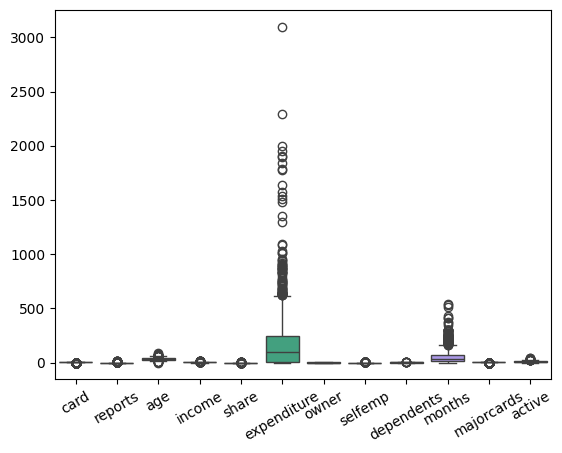

In [11]:
gr = sns.boxplot(data=dataset)
gr.set_xticks(ticks=dataset.columns)
gr.set_xticklabels(labels=dataset.columns, rotation=30)
None

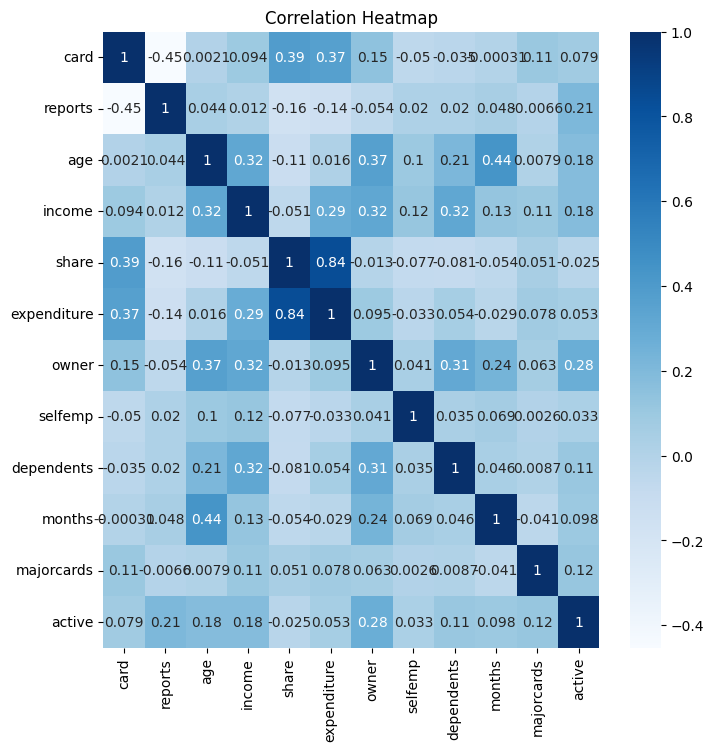

In [12]:
plt.figure(figsize = (8,8))
plt.title('Correlation Heatmap')
heatmap = sns.heatmap(dataset.corr(), annot = True, cmap='Blues')

In [13]:
df=dataset.drop(['expenditure',"majorcards","share"],axis=1)
df

,card,reports,age,income,owner,selfemp,dependents,months,active
0,1.0,0,37.66667,4.5200,1,0,3,54,12
1,1.0,0,33.25000,2.4200,0,0,3,34,13
2,1.0,0,33.66667,4.5000,1,0,4,58,5
4,1.0,0,30.50000,2.5400,0,0,0,25,7
5,1.0,0,32.16667,9.7867,1,0,2,64,5
...,...,...,...,...,...,...,...,...,...
1314,0.0,1,30.33333,2.1800,0,1,0,13,1
1316,0.0,5,23.91667,3.1920,0,0,3,12,5
1317,1.0,0,40.58333,4.6000,1,0,2,1,2
1318,1.0,0,32.83333,3.7000,0,1,0,60,7


In [14]:
df['card'].value_counts()

card
1.0    1013
0.0     295
Name: count, dtype: int64

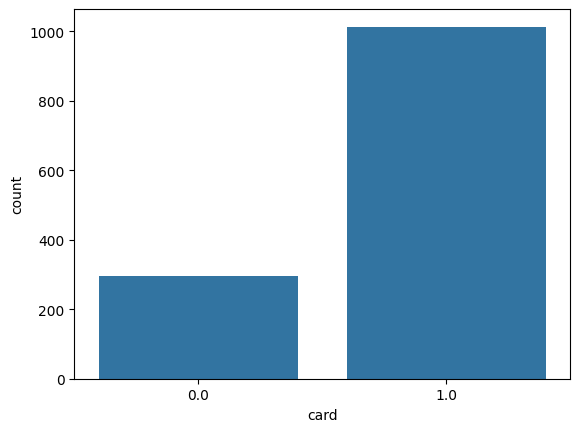

In [15]:
sns.countplot(x=df['card'])
None

Without fixing imbalance

In [16]:
features_cols = list(df.columns[1:])
features_cols

['reports',
 'age',
 'income',
 'owner',
 'selfemp',
 'dependents',
 'months',
 'active']

In [17]:
X=df[features_cols]
X

,reports,age,income,owner,selfemp,dependents,months,active
0,0,37.66667,4.5200,1,0,3,54,12
1,0,33.25000,2.4200,0,0,3,34,13
2,0,33.66667,4.5000,1,0,4,58,5
4,0,30.50000,2.5400,0,0,0,25,7
5,0,32.16667,9.7867,1,0,2,64,5
...,...,...,...,...,...,...,...,...
1314,1,30.33333,2.1800,0,1,0,13,1
1316,5,23.91667,3.1920,0,0,3,12,5
1317,0,40.58333,4.6000,1,0,2,1,2
1318,0,32.83333,3.7000,0,1,0,60,7


In [18]:
y=df.card
y

0       1.0
1       1.0
2       1.0
4       1.0
5       1.0
       ... 
1314    0.0
1316    0.0
1317    1.0
1318    1.0
1319    1.0
Name: card, Length: 1308, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [20]:
X_test.shape

(327, 8)

In [21]:
# Initiate Model
model = LogisticRegression(max_iter = 100000000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 29,  45],
       [  9, 244]], dtype=int64)

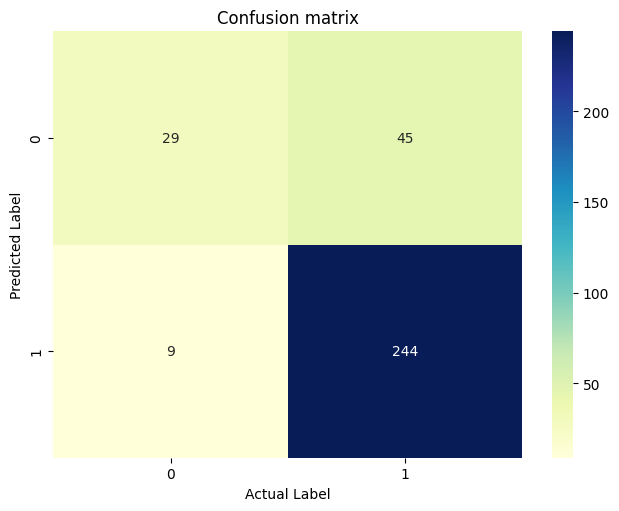

In [23]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#Create Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot= True, cmap = "YlGnBu", fmt ="g")
plt.tight_layout()
plt.title("Confusion matrix")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
None

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.39      0.52        74
         1.0       0.84      0.96      0.90       253

    accuracy                           0.83       327
   macro avg       0.80      0.68      0.71       327
weighted avg       0.83      0.83      0.81       327



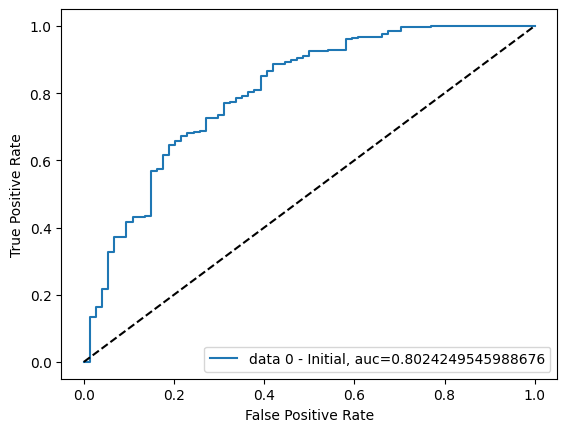

In [25]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr, tpr, label= "data 0 - Initial, auc=" +str(auc))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Downsampling

In [26]:
data_down = df.groupby('card', as_index = False).apply(lambda x: x.sample(n=295, random_state=0)).reset_index(drop=True) #n=295 No of people of no card

In [27]:
data_down

,card,reports,age,income,owner,selfemp,dependents,months,active
0,0.0,3,32.75000,3.00,1,0,3,32,7
1,0.0,1,28.50000,2.00,0,0,3,0,2
2,0.0,0,44.66667,1.80,0,0,2,33,0
3,0.0,0,47.75000,1.50,1,0,0,60,0
4,0.0,0,31.91667,2.10,0,0,2,60,2
...,...,...,...,...,...,...,...,...,...
585,1.0,0,35.83333,2.42,1,0,0,56,10
586,1.0,0,28.33333,6.20,1,0,0,18,9
587,1.0,1,34.83333,3.20,1,0,2,25,8
588,1.0,0,18.50000,2.50,0,0,0,4,1


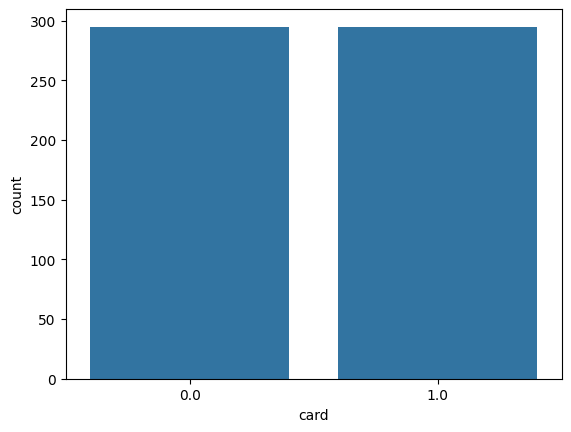

In [28]:
sns.countplot(x=data_down['card'])
None

In [29]:
X_d = data_down[features_cols]
y_d = data_down.card

In [30]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.25, random_state=0)

In [31]:
X_test_d.shape

(148, 8)

In [32]:
# Initiate Model
model_d = LogisticRegression(max_iter = 100000000)
model_d.fit(X_train_d, y_train_d)
y_pred_d = model_d.predict(X_test_d)

In [33]:
cnf_matrix_d = metrics.confusion_matrix(y_test_d, y_pred_d)
cnf_matrix_d

array([[50, 18],
       [24, 56]], dtype=int64)

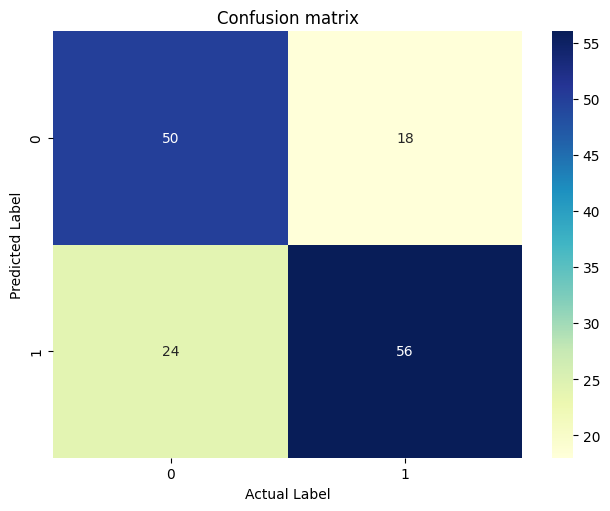

In [34]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#Create Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_d), annot= True, cmap = "YlGnBu", fmt ="g")
plt.tight_layout()
plt.title("Confusion matrix")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
None

In [35]:
print(classification_report(y_test_d, y_pred_d))

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.70        68
         1.0       0.76      0.70      0.73        80

    accuracy                           0.72       148
   macro avg       0.72      0.72      0.72       148
weighted avg       0.72      0.72      0.72       148



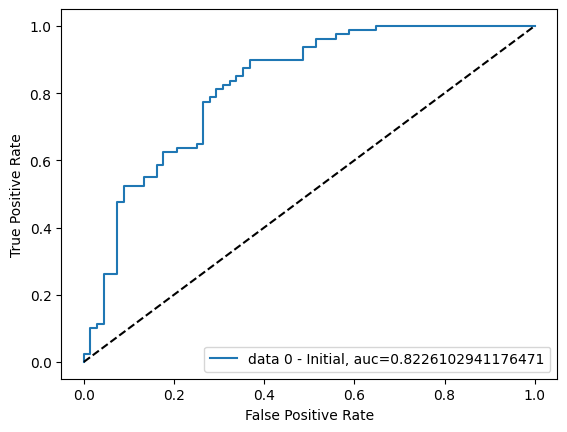

In [36]:
y_pred_proba_d = model_d.predict_proba(X_test_d)[::,1]
fpr_d, tpr_d, _ = metrics.roc_curve(y_test_d, y_pred_proba_d)
auc_d = metrics.roc_auc_score(y_test_d,y_pred_proba_d)

plt.plot(fpr_d, tpr_d, label= "data 0 - Initial, auc=" +str(auc_d))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Startification

In [37]:
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [38]:
X_test_str.shape

(327, 8)

In [39]:
# Initiate Model
model_str = LogisticRegression(max_iter = 100000000)
model_str.fit(X_train_str, y_train_str)
y_pred_str = model_str.predict(X_test_str)

In [40]:
cnf_matrix_str = metrics.confusion_matrix(y_test_str, y_pred_str)
cnf_matrix_str

array([[ 28,  46],
       [  9, 244]], dtype=int64)

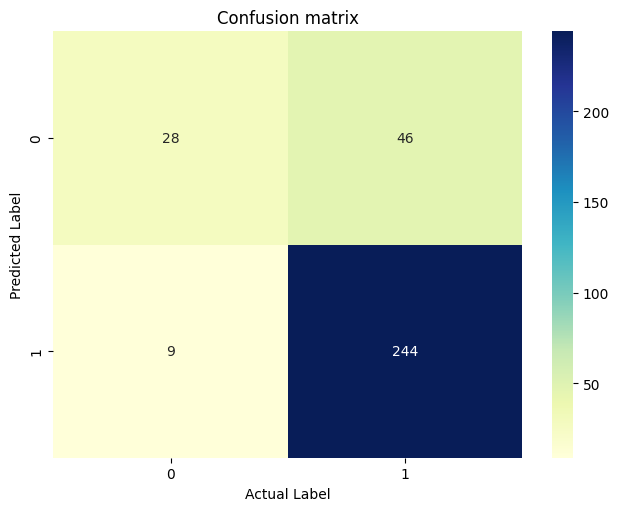

In [41]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#Create Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_str), annot= True, cmap = "YlGnBu", fmt ="g")
plt.tight_layout()
plt.title("Confusion matrix")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
None

In [42]:
print(classification_report(y_test_str, y_pred_str))

              precision    recall  f1-score   support

         0.0       0.76      0.38      0.50        74
         1.0       0.84      0.96      0.90       253

    accuracy                           0.83       327
   macro avg       0.80      0.67      0.70       327
weighted avg       0.82      0.83      0.81       327



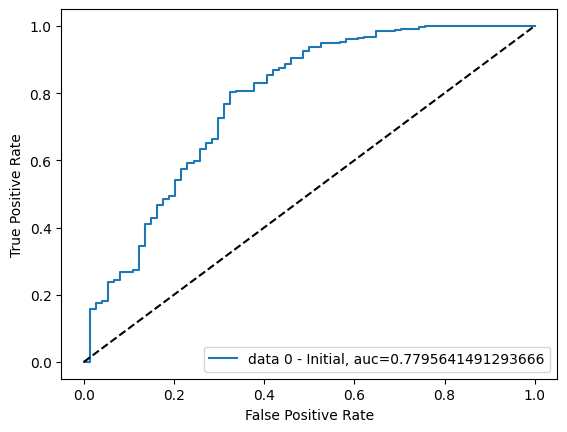

In [43]:
y_pred_proba_str = model_str.predict_proba(X_test_str)[::,1]
fpr_str, tpr_str, _ = metrics.roc_curve(y_test_str, y_pred_proba_str)
auc_str = metrics.roc_auc_score(y_test_str,y_pred_proba_str)

plt.plot(fpr_str, tpr_str, label= "data 0 - Initial, auc=" +str(auc_str))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Balanced Weights

In [44]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size=0.25, random_state=0)

In [45]:
# Initiate Model
model_bal = LogisticRegression(max_iter = 100000000, class_weight= 'balanced')
model_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = model_bal.predict(X_test_bal)

In [46]:
cnf_matrix_bal = metrics.confusion_matrix(y_test_bal, y_pred_bal)
cnf_matrix_bal

array([[ 49,  25],
       [ 54, 199]], dtype=int64)

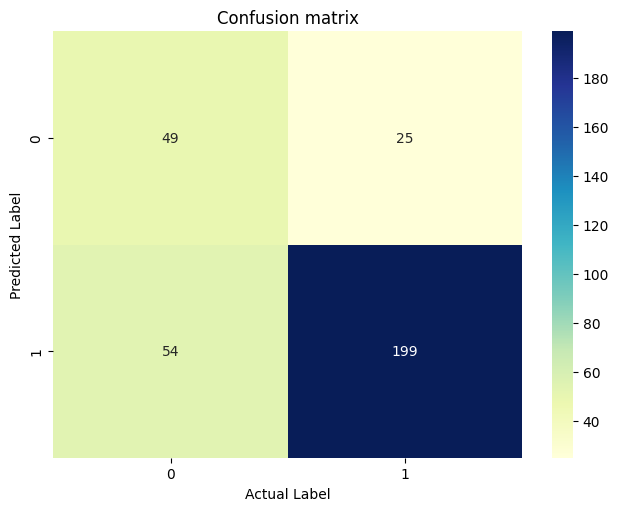

In [47]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#Create Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_bal), annot= True, cmap = "YlGnBu", fmt ="g")
plt.tight_layout()
plt.title("Confusion matrix")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
None

In [48]:
print(classification_report(y_test_bal, y_pred_bal))

              precision    recall  f1-score   support

         0.0       0.48      0.66      0.55        74
         1.0       0.89      0.79      0.83       253

    accuracy                           0.76       327
   macro avg       0.68      0.72      0.69       327
weighted avg       0.80      0.76      0.77       327



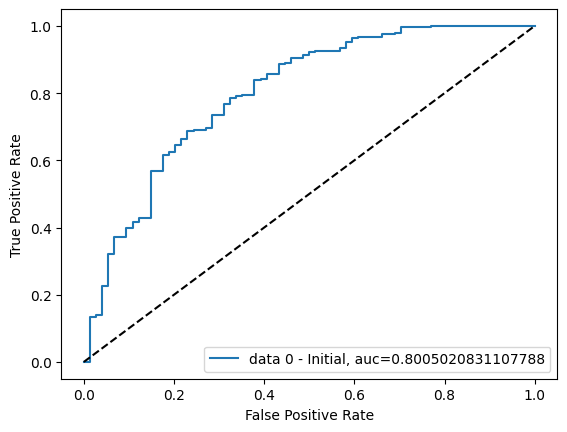

In [49]:
y_pred_proba_bal = model_bal.predict_proba(X_test_bal)[::,1]
fpr_bal, tpr_bal, _ = metrics.roc_curve(y_test_bal, y_pred_proba_bal)
auc_bal = metrics.roc_auc_score(y_test_bal,y_pred_proba_bal)

plt.plot(fpr_bal, tpr_bal, label= "data 0 - Initial, auc=" +str(auc_bal))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Comparison of all methods

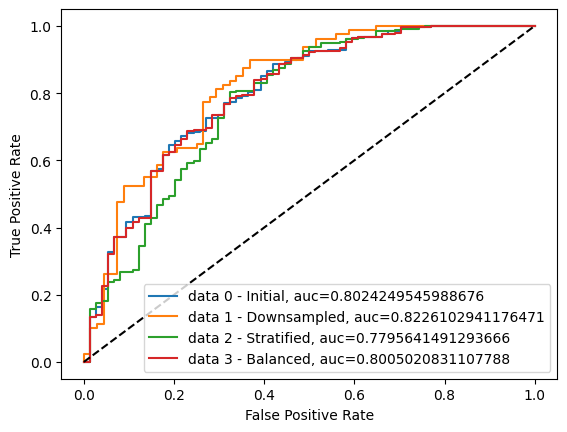

In [50]:
# ROC for all models

plt.plot(fpr, tpr, label= "data 0 - Initial, auc=" +str(auc))
plt.plot(fpr_d, tpr_d, label= "data 1 - Downsampled, auc=" +str(auc_d))
plt.plot(fpr_str, tpr_str, label= "data 2 - Stratified, auc=" +str(auc_str))
plt.plot(fpr_bal, tpr_bal, label= "data 3 - Balanced, auc=" +str(auc_bal))

plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()